__Läser in Leffes fil och gör en första analys på den__

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [9]:
# Necessary Sklearn objects used in the analysis
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR)

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
df1 = pd.read_excel('DataV75TillUffe_2018-12-21.xlsx')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 37 columns):
Datum          19437 non-null datetime64[ns]
Arstid         19437 non-null int64
Distans        19437 non-null int64
Startsatt      19437 non-null int64
Lopp           19437 non-null int64
Plac           19437 non-null int64
Hast           19437 non-null int64
V75PROC        19437 non-null float64
V_ODDS         19437 non-null float64
GRUPP          19437 non-null int64
VLP            19437 non-null float64
VNUM           19437 non-null int64
SVLP           19437 non-null float64
VSVLP          19437 non-null float64
VPN_SUM        19437 non-null float64
VPN_SUM_ORD    19437 non-null int64
VPK_SUM        19437 non-null float64
VPK_SUM_ORD    19437 non-null int64
VLPB           19437 non-null float64
SVLPB          19437 non-null float64
VSVLPB         19437 non-null float64
E_P            19437 non-null float64
E_P_Num        19437 non-null int64
E_N            19437 non-null fl

In [32]:
df1.head()

,Datum,Arstid,Distans,Startsatt,Lopp,Plac,Hast,V75PROC,V_ODDS,GRUPP,...,SP_R,ToR,P_R,TK_R,Ex_R,R_R,Ts_R,cdate,cLopp,Key
0,2016-05-21,1,3,2,1,1,1,0.55,1.3,1,...,0,0,1,0,0,0,1,2016-05-21 00:00:00,1,2016-05-21 00:00:001
1,2016-05-21,1,3,2,1,2,3,0.02,34.0,4,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
2,2016-05-21,1,3,2,1,3,8,0.00,97.3,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
3,2016-05-21,1,3,2,1,0,10,0.00,68.1,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
4,2016-05-21,1,3,2,1,0,4,0.01,53.8,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001


In [5]:
# Skapar en unik nyckel på lopp: Gör om Datum och lopp till en sträng

df1['cdate'] = df1.Datum.astype('object')
df1['cLopp'] = df1.Lopp.astype('object')

In [6]:
df1['Key'] = df1['cdate'].astype(str) + df1['cLopp'].astype(str)

In [7]:
len(df1)

19437

In [8]:
df1.Key.drop_duplicates().count()

1708

In [51]:
df1

,Datum,Arstid,Distans,Startsatt,Lopp,Plac,Hast,V75PROC,V_ODDS,GRUPP,...,SP_R,ToR,P_R,TK_R,Ex_R,R_R,Ts_R,cdate,cLopp,Key
0,2016-05-21,1,3,2,1,1,1,0.55,1.3,1,...,0,0,1,0,0,0,1,2016-05-21 00:00:00,1,2016-05-21 00:00:001
1,2016-05-21,1,3,2,1,2,3,0.02,34.0,4,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
2,2016-05-21,1,3,2,1,3,8,0.00,97.3,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
3,2016-05-21,1,3,2,1,0,10,0.00,68.1,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
4,2016-05-21,1,3,2,1,0,4,0.01,53.8,5,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
5,2016-05-21,1,3,2,1,0,5,0.07,13.9,3,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
6,2016-05-21,1,3,2,1,0,7,0.09,16.6,2,...,0,0,2,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001
7,2016-05-21,1,3,2,1,0,6,0.12,7.6,2,...,0,0,0,0,0,0,2,2016-05-21 00:00:00,1,2016-05-21 00:00:001
8,2016-05-21,1,3,2,1,0,2,0.06,17.6,3,...,0,0,0,0,0,0,3,2016-05-21 00:00:00,1,2016-05-21 00:00:001
9,2016-05-21,1,3,2,1,0,11,0.02,50.6,4,...,0,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001


In [8]:
# Skapar unik nyckel för V75 omgång: Datum, distans, Startsätt

In [36]:
#df1['Run'] = df1['cdate'].astype(str) + df1['Distans'].astype('str') + df1['Startsatt'].astype('str')

In [45]:
df1.head()

,Datum,Arstid,Distans,Startsatt,Lopp,Plac,Hast,V75PROC,V_ODDS,GRUPP,...,ToR,P_R,TK_R,Ex_R,R_R,Ts_R,cdate,cLopp,Key,Run
0,2016-05-21,1,3,2,1,1,1,0.55,1.3,1,...,0,1,0,0,0,1,2016-05-21 00:00:00,1,2016-05-21 00:00:001,2016-05-21 00:00:0032
1,2016-05-21,1,3,2,1,2,3,0.02,34.0,4,...,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001,2016-05-21 00:00:0032
2,2016-05-21,1,3,2,1,3,8,0.00,97.3,5,...,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001,2016-05-21 00:00:0032
3,2016-05-21,1,3,2,1,0,10,0.00,68.1,5,...,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001,2016-05-21 00:00:0032
4,2016-05-21,1,3,2,1,0,4,0.01,53.8,5,...,0,0,0,0,0,0,2016-05-21 00:00:00,1,2016-05-21 00:00:001,2016-05-21 00:00:0032


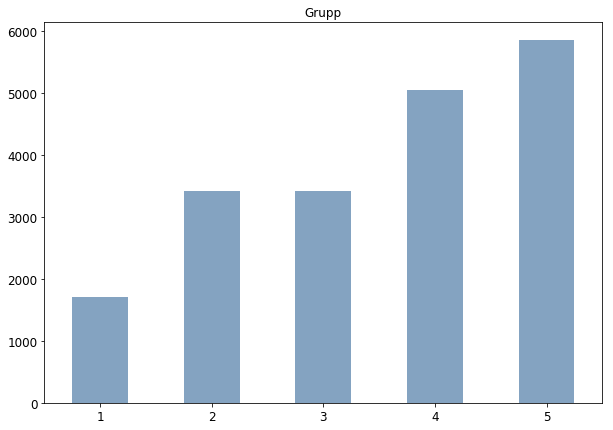

In [9]:
#RGB is a way of making colors. You have to to provide an amount of red, 
# green and blue + the transparency and it returns a color.
test = df1.GRUPP.value_counts().sort_index().plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6), rot = 0 , figsize=(10,7),
                                          title = 'Grupp')

In [11]:
type(test)

matplotlib.axes._subplots.AxesSubplot

__Gör några reality checks på datat - VLP__

In [12]:
df1['Key'][(df1.Plac == 1) & (df1.VLP > 50)].count()

52

In [13]:
df1['Key'].count()

19437

Saving figure VarLoppPROC


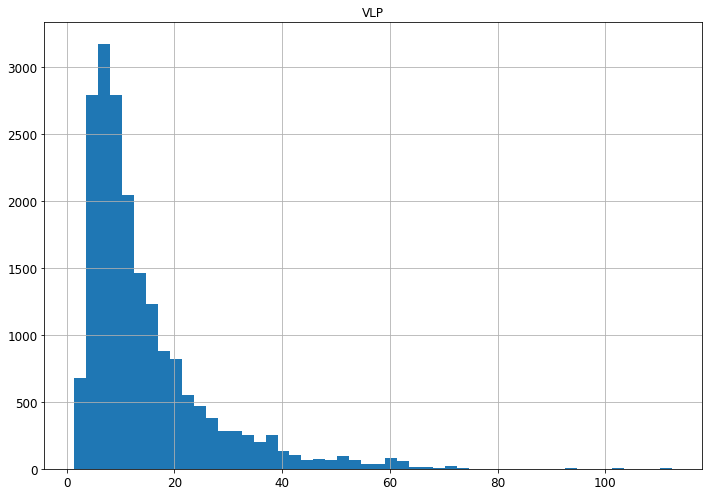

In [14]:

df1[['VLP']].hist(bins=50, figsize=(10,7))
save_fig("VarLoppPROC")
plt.show()

In [15]:
df1.Arstid.value_counts()

2    6478
1    4724
4    4129
3    4106
Name: Arstid, dtype: int64

__Väljer ut distans 2140 meter samt autostart__

In [16]:
# f1 = df1.Arstid == 3
#f2 = df1.Startsatt == 2
#f3 = df1.Distans == 2
#criteria = f2 & f3

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 40 columns):
Datum          19437 non-null datetime64[ns]
Arstid         19437 non-null int64
Distans        19437 non-null int64
Startsatt      19437 non-null int64
Lopp           19437 non-null int64
Plac           19437 non-null int64
Hast           19437 non-null int64
V75PROC        19437 non-null float64
V_ODDS         19437 non-null float64
GRUPP          19437 non-null int64
VLP            19437 non-null float64
VNUM           19437 non-null int64
SVLP           19437 non-null float64
VSVLP          19437 non-null float64
VPN_SUM        19437 non-null float64
VPN_SUM_ORD    19437 non-null int64
VPK_SUM        19437 non-null float64
VPK_SUM_ORD    19437 non-null int64
VLPB           19437 non-null float64
SVLPB          19437 non-null float64
VSVLPB         19437 non-null float64
E_P            19437 non-null float64
E_P_Num        19437 non-null int64
E_N            19437 non-null fl

__Skapar en kopia, droppar de variabler som inte ska vara med i analysen samt sätter index__

__Sedan skapar vi en målvariabel Y . Om plac 1,2 3 = 1, annars 0)__

In [71]:
df1['Y'] = np.where(df1['Plac'].isin([1]), 1,0)
#df2['Y'] = np.where(df2.loc[:,'Plac'].isin([1]), 1,0)

In [72]:
df2 = df1[(df1.Datum > '2016-05-20')]. \
drop(['Datum','Arstid','Distans','Startsatt','Lopp','Plac','Hast','cdate','cLopp'], axis = 1). \
copy().set_index(['Key'])

In [74]:
df2

,V75PROC,V_ODDS,GRUPP,VLP,VNUM,SVLP,VSVLP,VPN_SUM,VPN_SUM_ORD,VPK_SUM,...,A_R,T_R,SP_R,ToR,P_R,TK_R,Ex_R,R_R,Ts_R,Y
Key,,,,,,,,,,,,,,,,,,,,,
2016-05-21 00:00:001,0.55,1.3,1,22.53,1,1.13,0.42,1.00,1,1.39,...,1,1,0,0,1,0,0,0,1,1
2016-05-21 00:00:001,0.02,34.0,4,22.53,7,1.13,0.42,0.26,11,0.02,...,0,0,0,0,0,0,0,0,0,0
2016-05-21 00:00:001,0.00,97.3,5,22.53,10,1.13,0.42,0.21,12,0.16,...,0,0,0,0,0,0,0,0,0,0
2016-05-21 00:00:001,0.00,68.1,5,22.53,11,1.13,0.42,0.28,10,0.04,...,0,0,0,0,0,0,0,0,0,0
2016-05-21 00:00:001,0.01,53.8,5,22.53,9,1.13,0.42,1.00,2,0.01,...,0,0,0,0,0,0,0,0,0,0
2016-05-21 00:00:001,0.07,13.9,3,22.53,4,1.13,0.42,0.97,3,0.55,...,0,0,0,0,0,0,0,0,0,0
2016-05-21 00:00:001,0.09,16.6,2,22.53,3,1.13,0.42,0.70,4,0.19,...,0,2,0,0,2,0,0,0,0,0
2016-05-21 00:00:001,0.12,7.6,2,22.53,2,1.13,0.42,0.70,5,0.92,...,3,3,0,0,0,0,0,0,2,0
2016-05-21 00:00:001,0.06,17.6,3,22.53,5,1.13,0.42,0.41,6,0.11,...,2,0,0,0,0,0,0,0,3,0


In [13]:
df2.Arstid.value_counts()

2    6478
1    4724
4    4129
3    4106
Name: Arstid, dtype: int64

In [22]:
df2.Key.drop_duplicates().count()

202

__Vi tar fram procentuell fördelningar av vinnande hästar på ett antal dimensioner och mått. Måtten delar vi in i klasser för att kunna ta fram fördelningar__

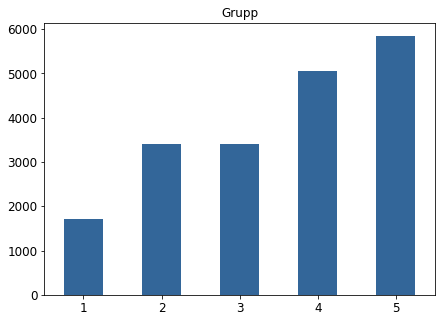

In [14]:
#RGB is a way of making colors. You have to to provide an amount of red, 
# green and blue + the transparency and it returns a color.
test = df2.GRUPP.value_counts().sort_index().plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0 , figsize=(7,5),
                                          title = 'Grupp')

In [15]:
df2.groupby('GRUPP')['Y'].sum()

GRUPP
1    654
2    538
3    260
4    189
5     65
Name: Y, dtype: int64

In [25]:
df2.plot?

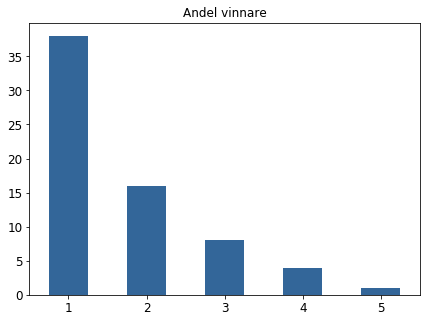

In [16]:
# Andel vinnare per grupp
(round(df2.groupby('GRUPP')['Y'].sum()/df2.GRUPP.value_counts(),2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0 , figsize=(7,5),
                                          title = 'Andel vinnare')
plt.show()

In [18]:
df2[(df2.Datum > '2016-05-20') & (df2.VLP >= 21.57)].groupby('GRUPP')['Y'].sum()

GRUPP
1    201
2     99
3     25
4     21
5      1
Name: Y, dtype: int64

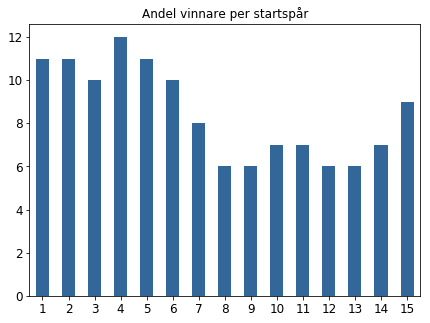

In [19]:
# Andel vinnare per startnummer
(round(df2.groupby('Hast')['Y'].sum()/df2.Hast.value_counts(),2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0 , figsize=(7,5),
                                          title = 'Andel vinnare per startspår')
plt.show()



Saving figure Grundstat


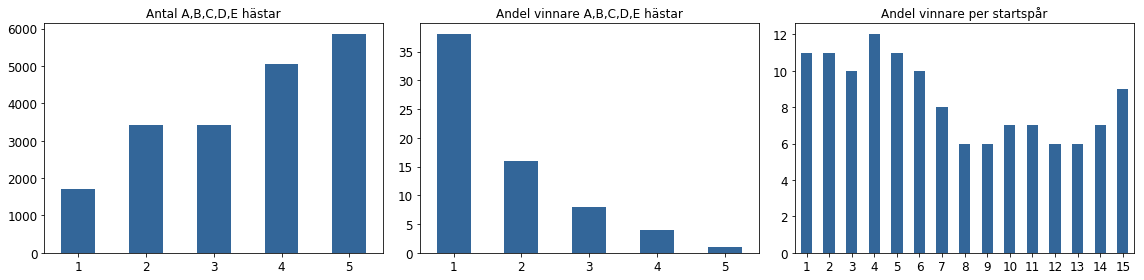

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))


df2.GRUPP.value_counts().sort_index().plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0 ,
                                          title = 'Antal A,B,C,D,E hästar', ax = ax1)


(round(df2.groupby('GRUPP')['Y'].sum()/df2.GRUPP.value_counts(),2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0, 
                                          title = 'Andel vinnare A,B,C,D,E hästar', ax = ax2)

(round(df2.groupby('Hast')['Y'].sum()/df2.Hast.value_counts(),2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1), rot = 0 ,
                                          title = 'Andel vinnare per startspår', ax = ax3)

save_fig('Grundstat')

__Nu kategoriserar vi de kontinuerliga variablerna. Delar in i kvartiler__

In [21]:
data = df2.VLP.values
quartiles = pd.qcut(data, 10)
pd.value_counts(quartiles)

(4.77, 6.07]       1963
(10.63, 12.77]     1961
(7.51, 8.86]       1954
(15.89, 20.42]     1948
(1.379, 4.77]      1947
(29.71, 112.44]    1943
(20.42, 29.71]     1937
(8.86, 10.63]      1930
(6.07, 7.51]       1928
(12.77, 15.89]     1926
dtype: int64

In [22]:
grouped = df2.Y.groupby(quartiles)

Saving figure VariansenV75PROCDeciler


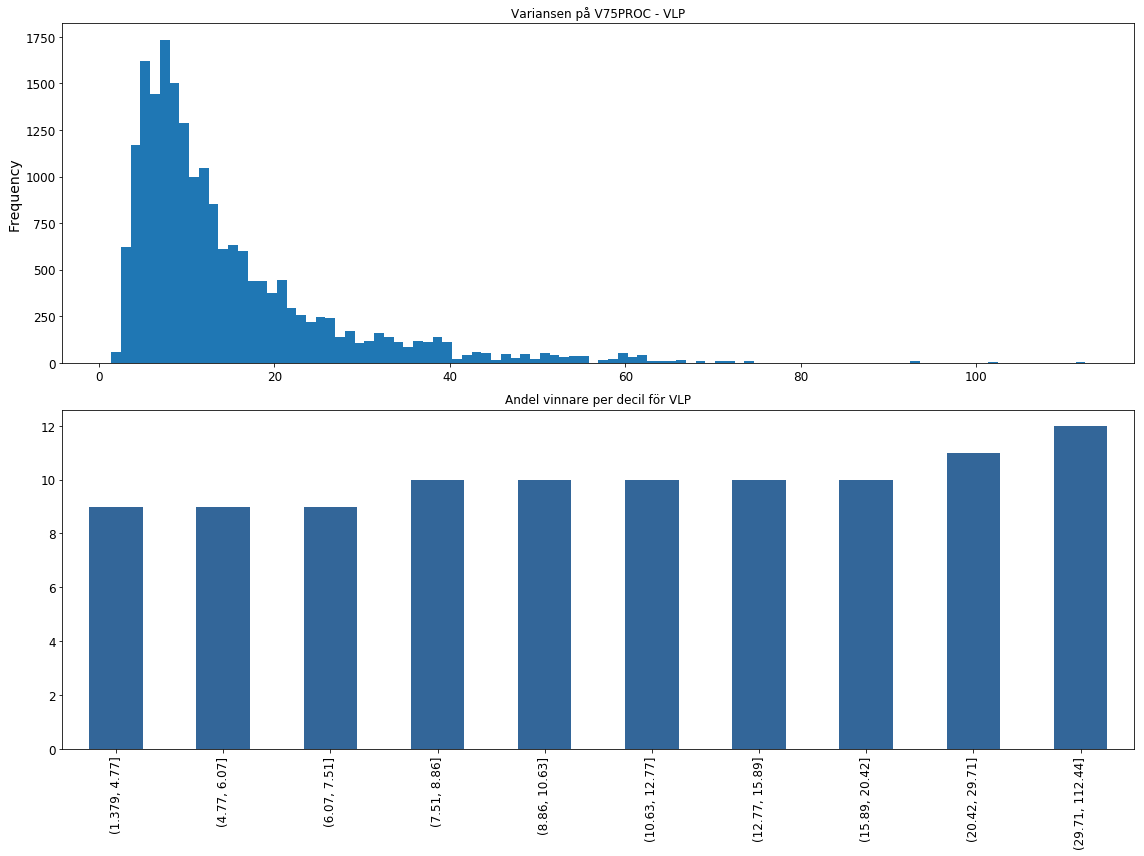

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

#df2[['VLP']].hist(bins=50, ax = ax1, label = 'Variansen på V75PROC - VLP')

df2.VLP.plot(kind = 'hist', bins = 100, title = 'Variansen på V75PROC - VLP', ax = ax1)


(round((grouped.sum() / df2.Key.drop_duplicates().count()), 2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1),
                       title = 'Andel vinnare per decil för VLP', ax = ax2)
save_fig('VariansenV75PROCDeciler')

In [24]:
data_SVLP = df2.SVLP.values
quartiles_SVLP = pd.qcut(data_SVLP, 10)
pd.value_counts(quartiles_SVLP)

(1.11, 1.71]     2005
(0.079, 1.11]    2004
(3.64, 4.36]     1974
(3.04, 3.64]     1948
(7.12, 19.26]    1943
(2.13, 2.57]     1929
(5.48, 7.12]     1928
(4.36, 5.48]     1914
(2.57, 3.04]     1897
(1.71, 2.13]     1895
dtype: int64

In [25]:
grouped_SVLP = df2.Y.groupby(quartiles_SVLP)

Saving figure SVLP


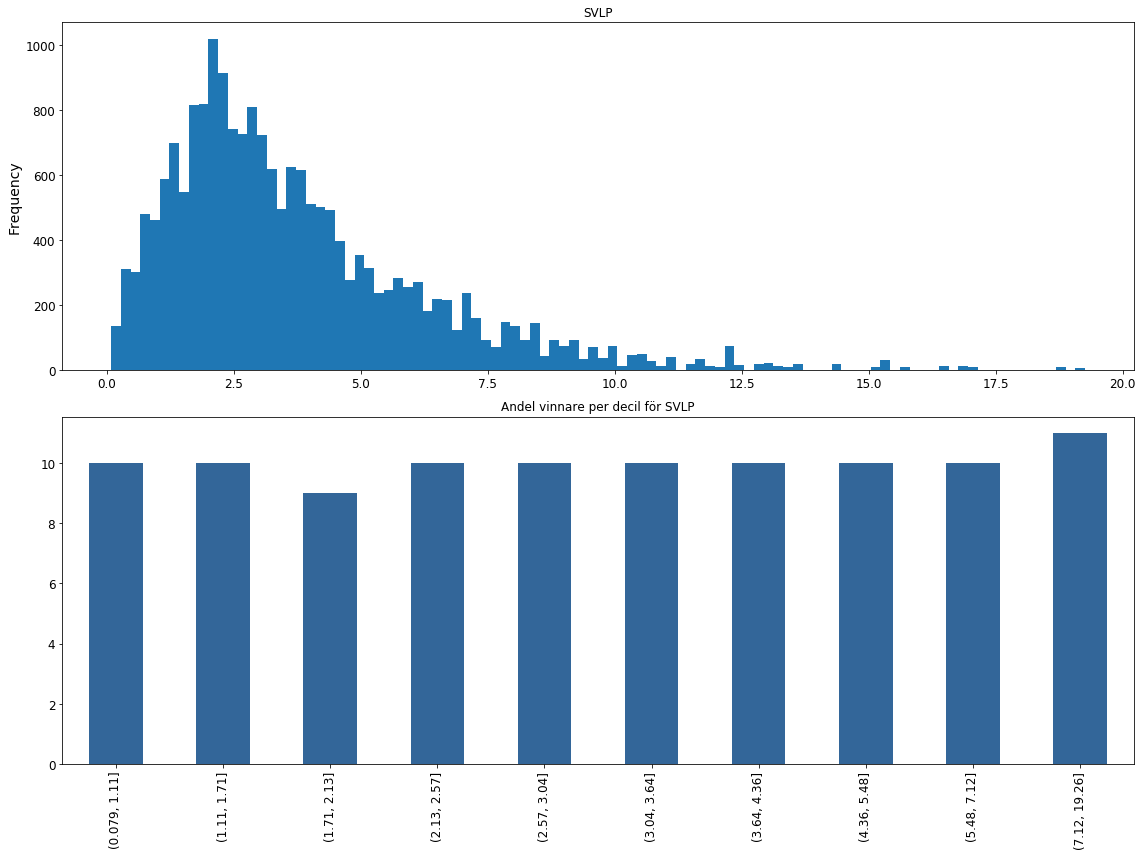

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))


df2.SVLP.plot(kind = 'hist', bins = 100, title = 'SVLP', ax = ax1)


(round((grouped_SVLP.sum() / df2.Key.drop_duplicates().count()), 2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1),
                       title = 'Andel vinnare per decil för SVLP', ax = ax2)
save_fig('SVLP')

In [27]:
data_VSVLP = df2.VSVLP.values
quartiles_VSVLP = pd.qcut(data_VSVLP, 10)
pd.value_counts(quartiles_VSVLP)
grouped_VSVLP = df2.Y.groupby(quartiles_VSVLP)

Saving figure VSVLP


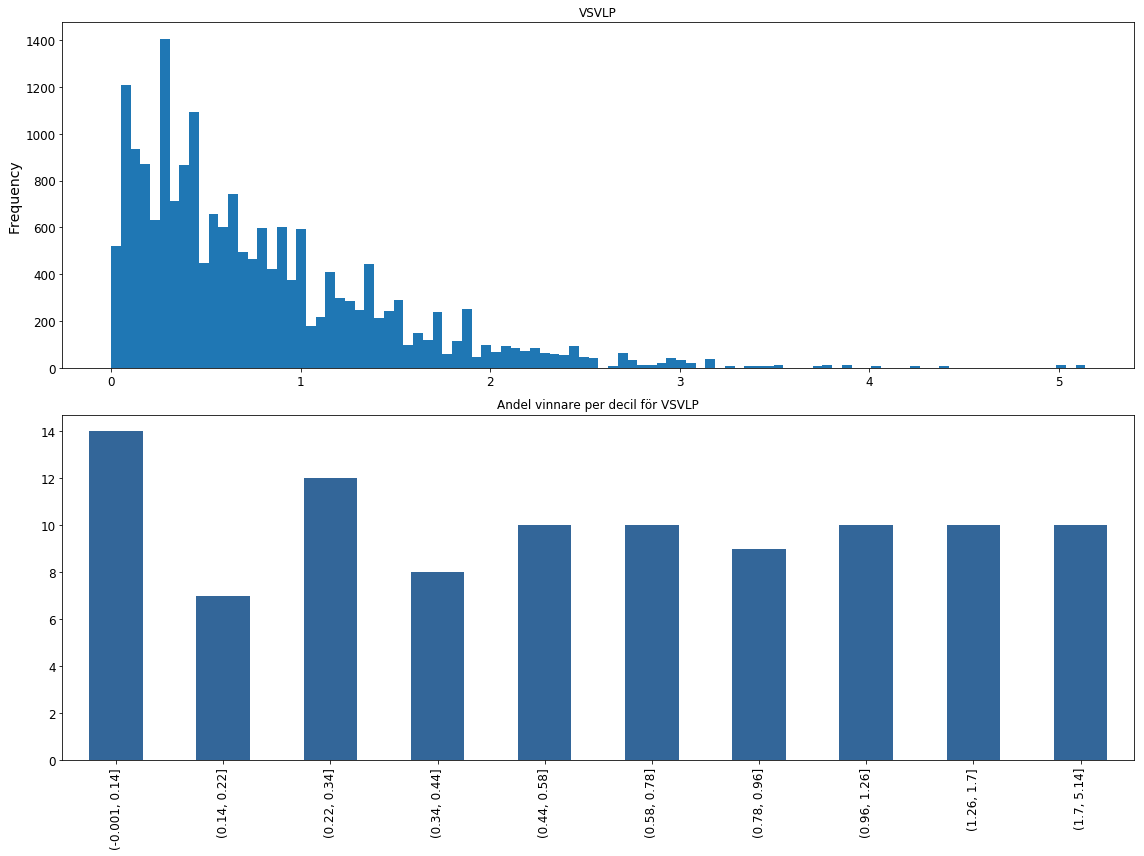

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))


df2.VSVLP.plot(kind = 'hist', bins = 100, title = 'VSVLP', ax = ax1)


(round((grouped_VSVLP.sum() / df2.Key.drop_duplicates().count()), 2) * 100).plot(kind = 'bar', color=(0.2, 0.4, 0.6, 1),
                       title = 'Andel vinnare per decil för VSVLP', ax = ax2)
save_fig('VSVLP')

In [29]:
df2[(df2.Datum > '2016-05-20') & (df2.VSVLP <= 0.14)].groupby('GRUPP')['Y'].sum()

GRUPP
1    128
2     70
3     26
4     15
5      5
Name: Y, dtype: int64

__Bygger en modell för att klassficera sannolikhet för respons__

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 41 columns):
Datum          19437 non-null datetime64[ns]
Arstid         19437 non-null int64
Distans        19437 non-null int64
Startsatt      19437 non-null int64
Lopp           19437 non-null int64
Plac           19437 non-null int64
Hast           19437 non-null int64
V75PROC        19437 non-null float64
V_ODDS         19437 non-null float64
GRUPP          19437 non-null int64
VLP            19437 non-null float64
VNUM           19437 non-null int64
SVLP           19437 non-null float64
VSVLP          19437 non-null float64
VPN_SUM        19437 non-null float64
VPN_SUM_ORD    19437 non-null int64
VPK_SUM        19437 non-null float64
VPK_SUM_ORD    19437 non-null int64
VLPB           19437 non-null float64
SVLPB          19437 non-null float64
VSVLPB         19437 non-null float64
E_P            19437 non-null float64
E_P_Num        19437 non-null int64
E_N            19437 non-null fl

__Först droppar vi alla variabler som inte ska med i analysen__

In [ ]:
df3 = df2.drop(['cdate','cLopp'])